In [37]:
!pip install shap

# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Loading Dataset directly from Colab Files folder
df = pd.read_excel('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv.xlsx')

In [39]:
# Quick Overview
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


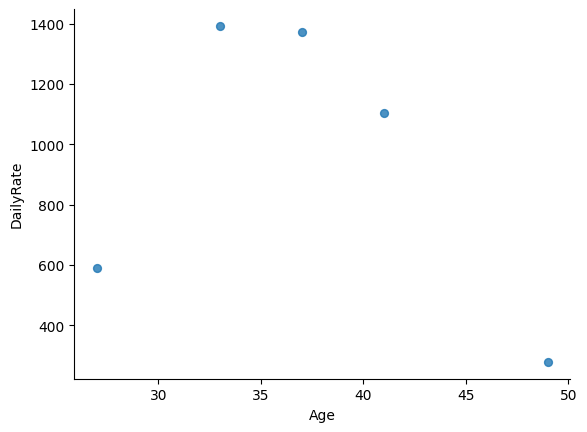

In [40]:
from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Age', y='DailyRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

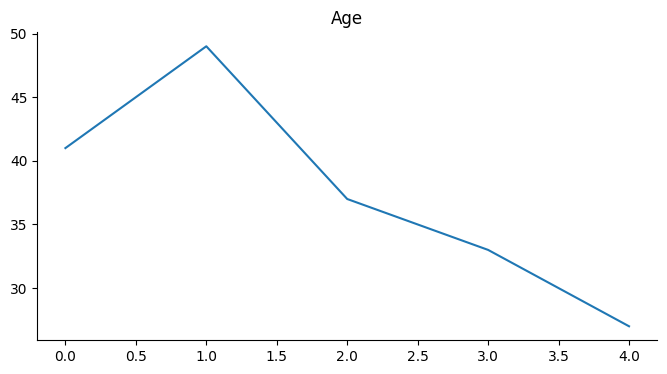

In [41]:
from matplotlib import pyplot as plt
_df_44['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

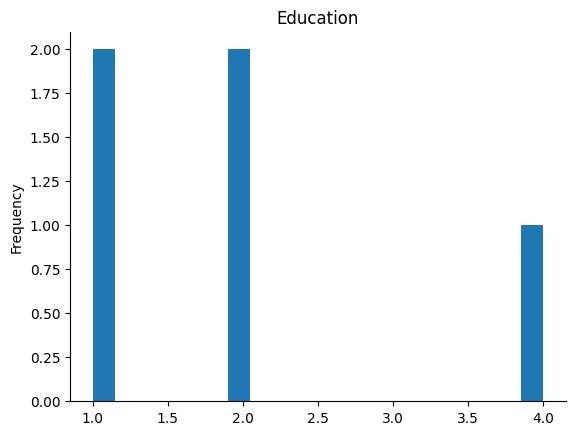

In [42]:
from matplotlib import pyplot as plt
_df_31['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

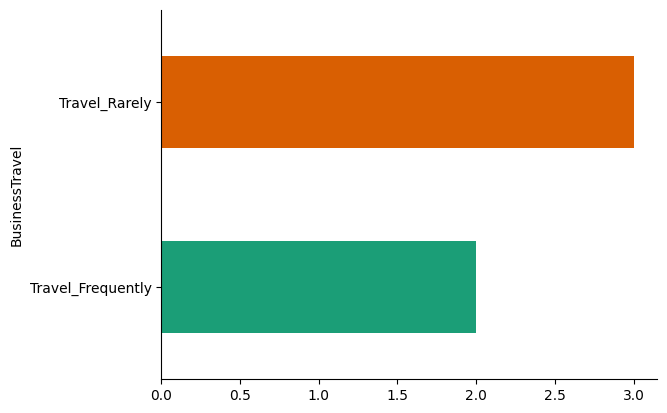

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('BusinessTravel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

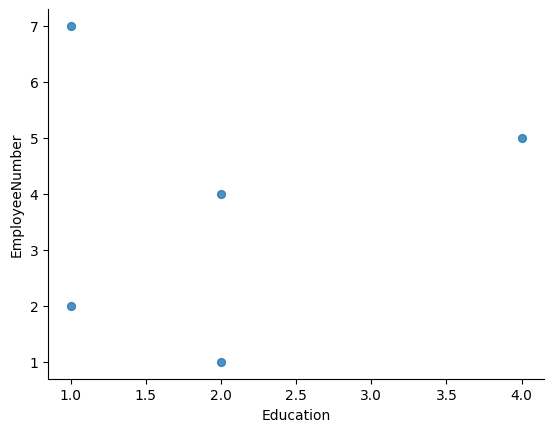

In [44]:
from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Education', y='EmployeeNumber', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

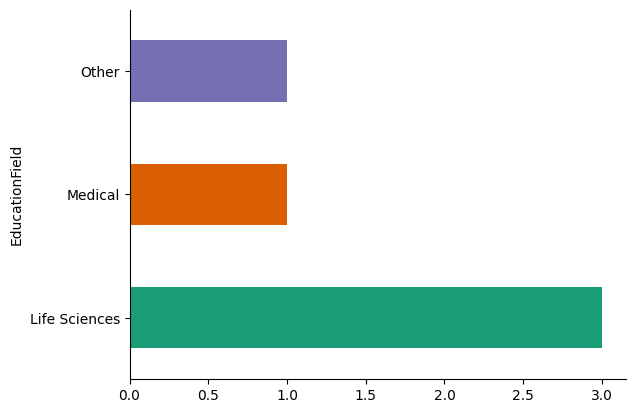

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('EducationField').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
# Data Cleaning

# Convert Attrition to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop useless columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [47]:
# Train-Test Split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Model Building (Logistic Regression)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       380
           1       0.52      0.18      0.27        61

    accuracy                           0.86       441
   macro avg       0.70      0.58      0.60       441
weighted avg       0.83      0.86      0.83       441

Confusion Matrix:
 [[370  10]
 [ 50  11]]
ROC AUC Score: 0.766220880069025


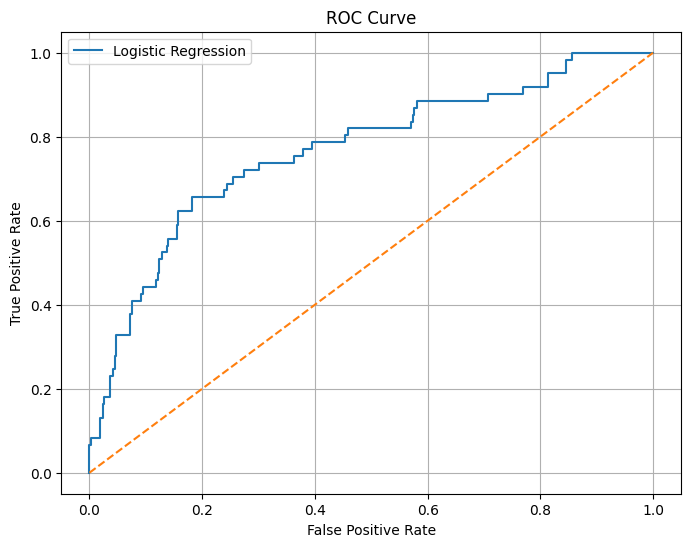

In [49]:
# Evaluation

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
y_prob = model.predict_proba(X_test)[:,1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

  0%|          | 0/441 [00:00<?, ?it/s]

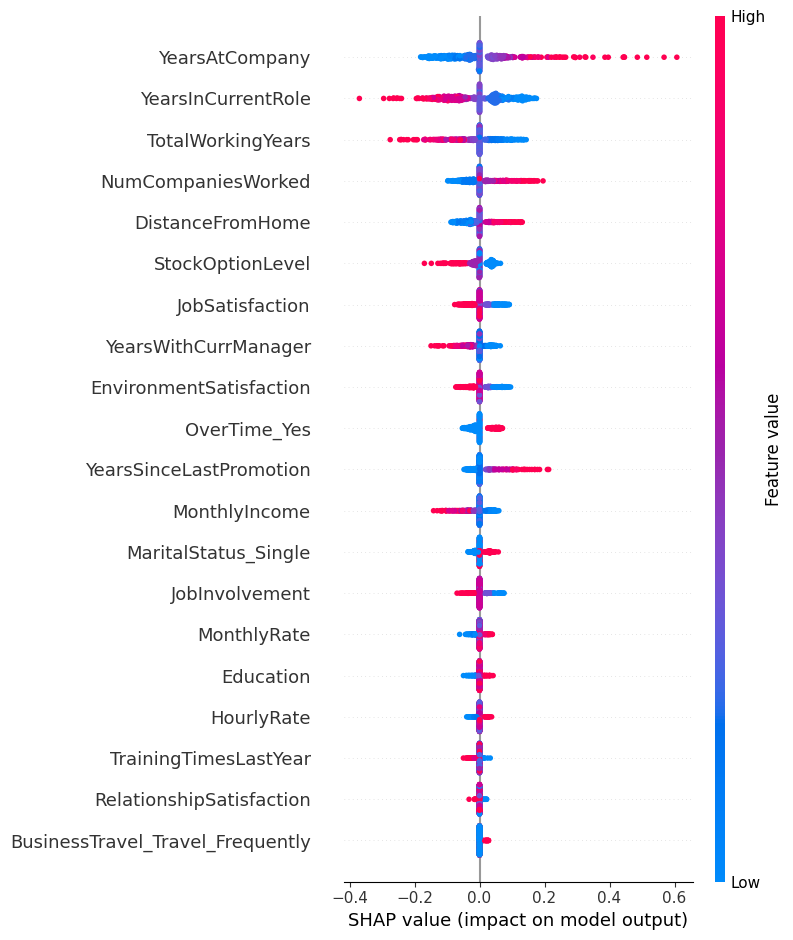

In [50]:
# Using SHAP Explainability (final stable version)

# Convert train and test to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Use a sample of background data to speed up SHAP
background = shap.sample(X_train_np, 100, random_state=42)

# Define function returning probability of class 1 (Attrition=Yes)
def predict_proba_class1(X):
    return model.predict_proba(X)[:, 1]

# Use KernelExplainer with the correct model function
explainer = shap.KernelExplainer(predict_proba_class1, background)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_np)

# Convert to DataFrame to preserve feature names
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Summary plot with feature names
shap.summary_plot(shap_df.values, X_test)


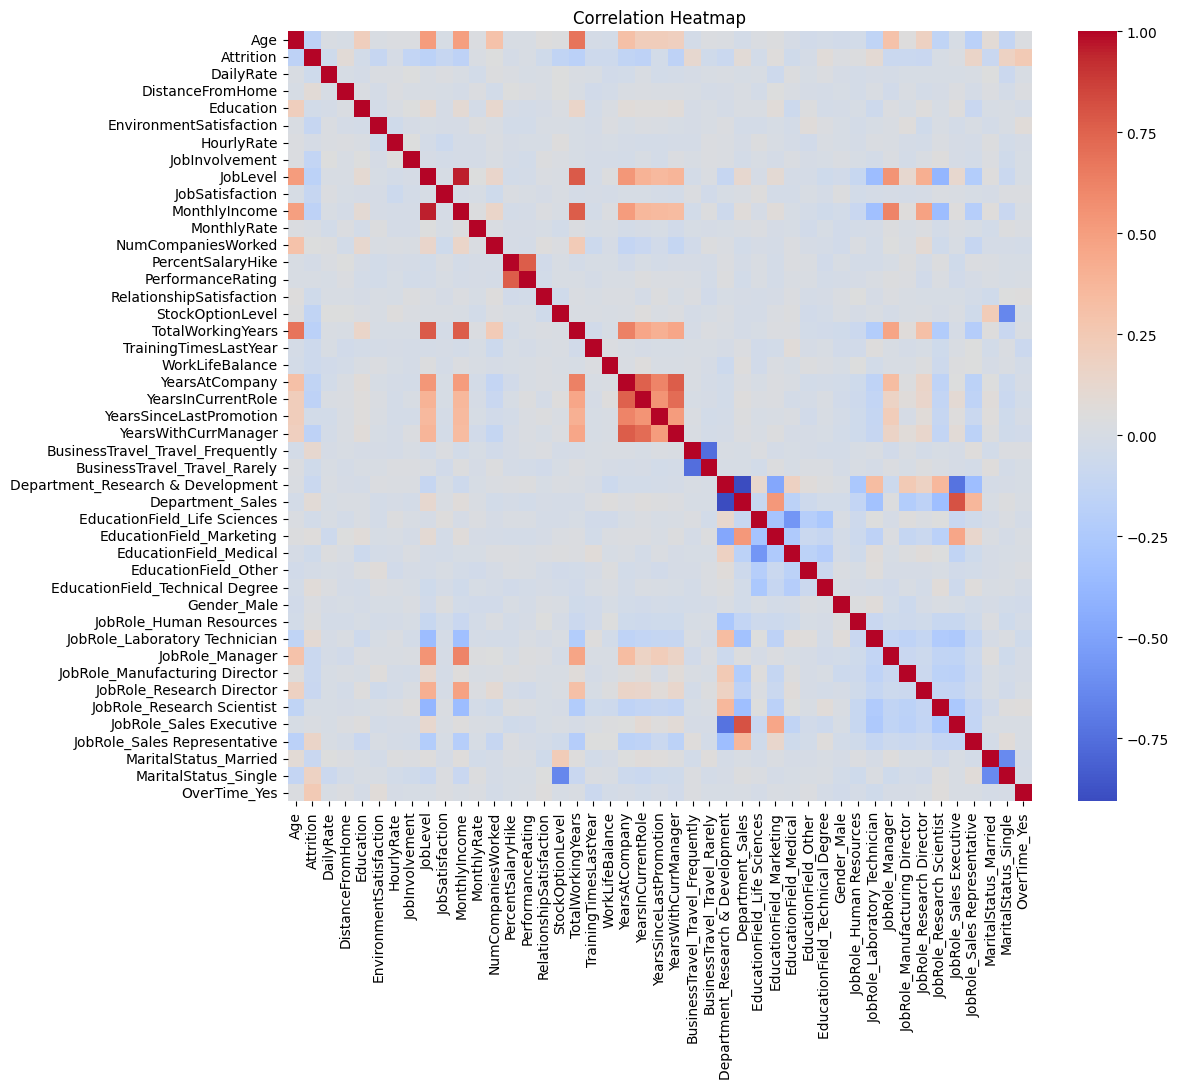

In [51]:
# Correlation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()